### EDA - Compara


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from colores import colores

In [130]:
# Temperaturas diurnas
df_d = pd.read_csv("csv/ts_d.csv", parse_dates=["fecha"],
    dtype={"pino": "float64",
           "estepa": "float64",
           "mes": "int64",
           "delta": "float64"
          })
df_d.head(10)

,fecha,estepa,pino,mes,delta
0,2020-01-01,36.280639,30.976251,1,5.304388
1,2020-01-09,33.107195,26.849177,1,6.258017
2,2020-01-17,40.126597,33.924788,1,6.201808
3,2020-01-25,34.904348,28.310403,1,6.593945
4,2020-02-02,34.400693,27.574299,2,6.826394
5,2020-02-10,30.593728,25.033515,2,5.560213
6,2020-02-18,31.541956,25.955979,2,5.585977
7,2020-02-26,36.649758,31.037088,2,5.612670
8,2020-03-05,30.742659,25.520392,3,5.222267
9,2020-03-13,28.569933,23.153814,3,5.416119


In [131]:
# Temperaturas diurnas (diarias)
df_d_diaria = pd.read_csv("csv/ts_d_diario.csv", parse_dates=["fecha"],
    dtype={"pino": "float64",
           "estepa": "float64",
           "mes": "int64",
           "delta": "float64"
          })
df_d_diaria.head(10)

,fecha,estepa,pino,mes,delta
0,2020-01-01,35.433453,33.666374,1,1.767079
1,2020-01-02,36.195872,31.342840,1,4.853032
2,2020-01-03,35.245773,31.284172,1,3.961601
3,2020-01-04,38.821326,31.450303,1,7.371023
4,2020-01-05,NaN,17.944593,1,NaN
5,2020-01-06,NaN,NaN,1,NaN
6,2020-01-07,25.590980,19.523039,1,6.067942
7,2020-01-08,NaN,NaN,1,NaN
8,2020-01-09,NaN,NaN,1,NaN
9,2020-01-10,27.450967,22.472114,1,4.978853


In [132]:
# Temperaturas diurnas (diarias) imputadas

#archivo = 'ts_imputado_simple'
#metodo = 'Imputación simple'

#archivo = 'ts_imputado_interpola_time'
#metodo = 'Imputación por interpolación (time)'

#archivo = 'ts_imputado_polinomio'
#metodo = 'Imputación por interpolación (polinomio grado 2)'

archivo = 'ts_imputado_bilstm'
metodo = 'Imputación con BILSTM'

df_d_diaria_i = pd.read_csv(f"csv/{archivo}.csv",
    parse_dates=["fecha"],
    dtype={"pino": "float64",
           "estepa": "float64",
           "mes": "int64",
           "delta": "float64"
          })
df_d_diaria_i.head(10)

,fecha,estepa,pino,mes,delta
0,2020-01-01,35.433453,33.666374,1,1.767079
1,2020-01-02,36.195872,31.342840,1,4.853032
2,2020-01-03,35.245773,31.284172,1,3.961601
3,2020-01-04,38.821326,31.450303,1,7.371023
4,2020-01-05,25.380878,17.944593,1,7.436285
5,2020-01-06,24.355303,19.609804,1,4.745499
6,2020-01-07,25.590980,19.523039,1,6.067942
7,2020-01-08,23.469503,18.861063,1,4.608440
8,2020-01-09,23.904425,19.318012,1,4.586412
9,2020-01-10,27.450967,22.472114,1,4.978853


### Comparación de series de tiempo diarias y 8D

In [133]:
def plot_serie(inicio='2020-01-01',fin='2020-04-01', col='pino', metodo='', imputados=True):
    
    if (imputados):
        a = 1
    else:
        a = 0.6 # alpha

    df_d_range = df_d[(df_d['fecha'] >= inicio) & (df_d['fecha'] <= fin)]
    df_n_range = df_n[(df_n['fecha'] >= inicio) & (df_n['fecha'] <= fin)]
    
    df_d_diaria_range = df_d_diaria[(df_d_diaria['fecha'] >= inicio) & (df_d_diaria['fecha'] <= fin)]
    df_n_diaria_range = df_n_diaria[(df_n_diaria['fecha'] >= inicio) & (df_n_diaria['fecha'] <= fin)]

    df_d_diaria_i_range = df_d_diaria_i[(df_d_diaria['fecha'] >= inicio) & (df_d_diaria_i['fecha'] <= fin)]
    df_n_diaria_i_range = df_n_diaria_i[(df_n_diaria['fecha'] >= inicio) & (df_n_diaria_i['fecha'] <= fin)]

    fig, axs = plt.subplots(1, 1, figsize=(12, 4))
    
    # --- Gráfico día ---
    if (imputados):
        axs.bar(df_d_diaria_i_range['fecha'], df_d_diaria_i_range[col], color='black', alpha=a)
    axs.bar(df_d_diaria_range['fecha'], df_d_diaria_range[col], color=colores['dia'], alpha=a)
    axs.plot(df_d_range['fecha'], df_d_range[col], color='red', marker='o')
    
    axs.set_title(f"Temperaturas diurnas {col} - ({inicio} - {fin}) {metodo}")
    axs.set_ylabel("temp")
    axs.grid(axis='y')

    
    # Eje X compartido
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

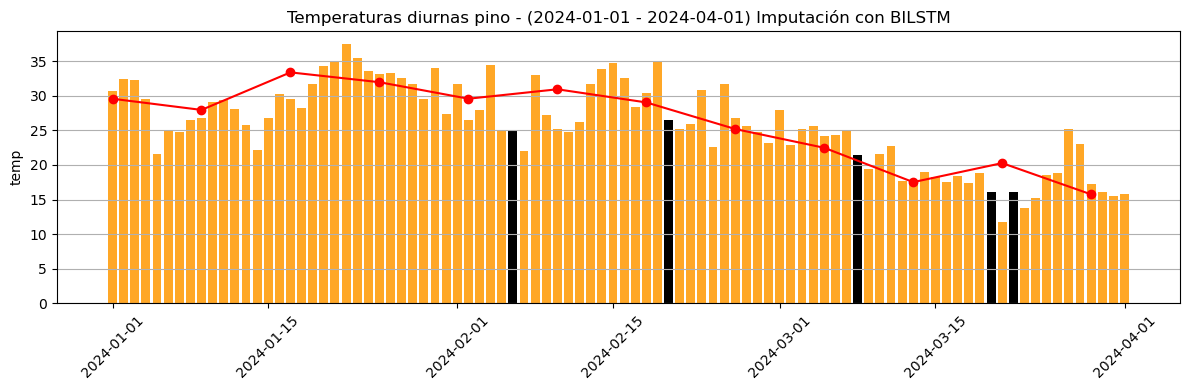

In [134]:
plot_serie('2024-01-01', '2024-04-01', 'pino', metodo, imputados=True)

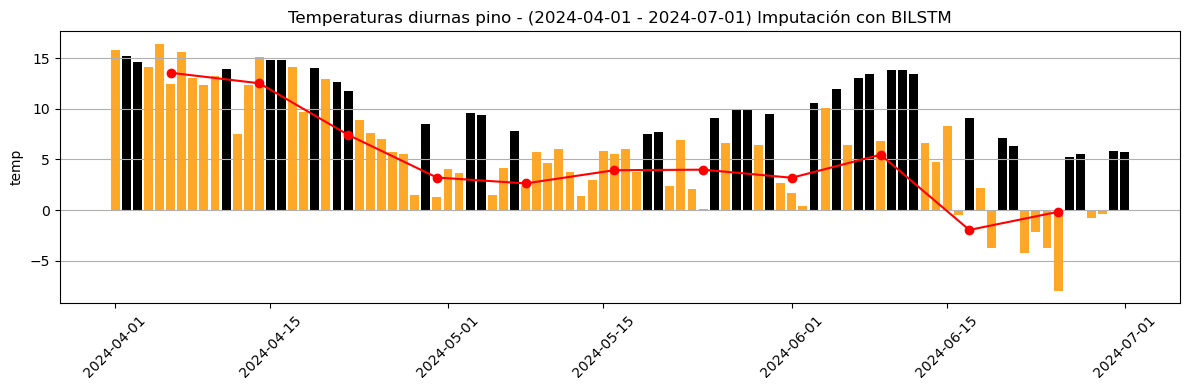

In [135]:
plot_serie('2024-04-01', '2024-07-01', 'pino', metodo)

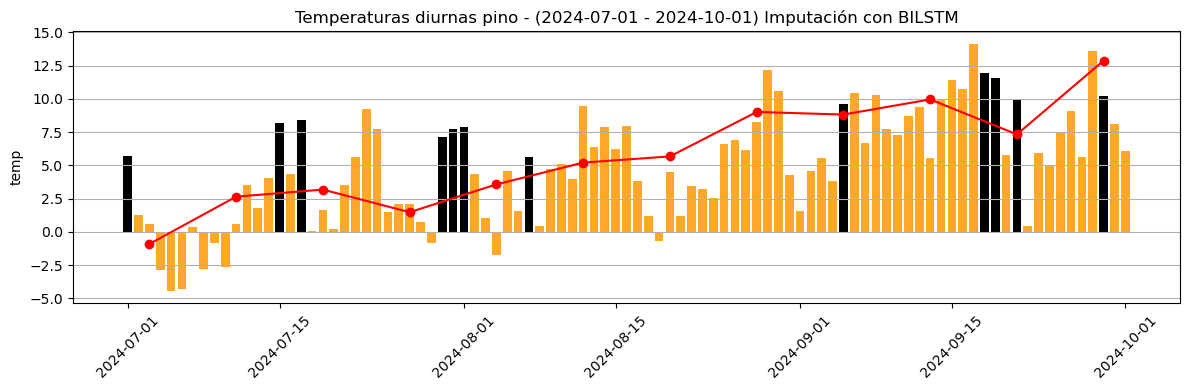

In [136]:
plot_serie('2024-07-01', '2024-10-01', 'pino', metodo)

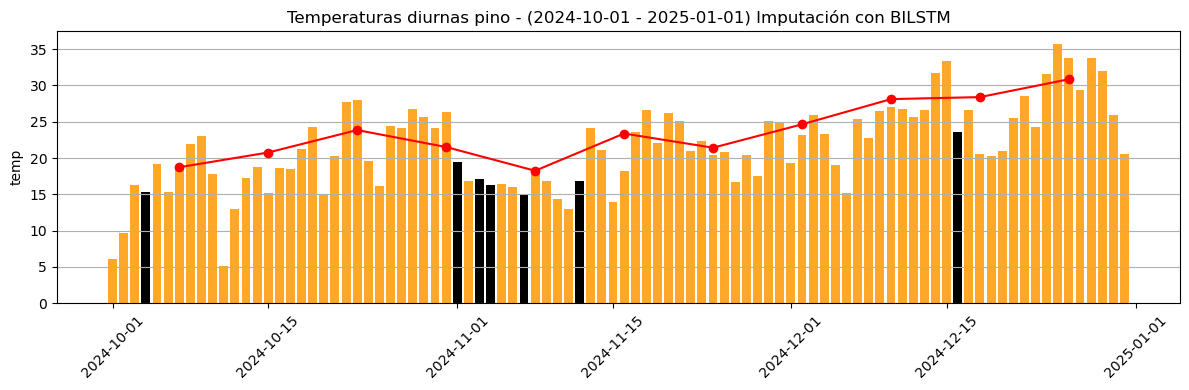

In [137]:
plot_serie('2024-10-01', '2025-01-01', 'pino', metodo)

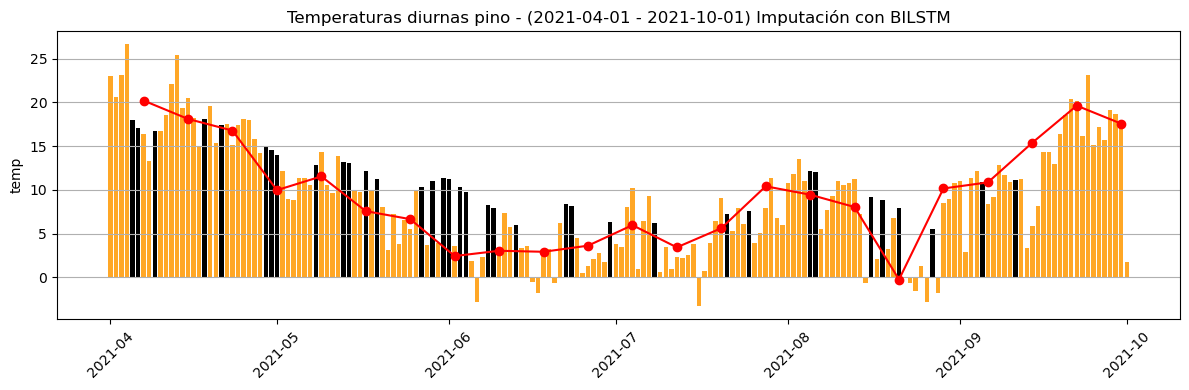

In [138]:
plot_serie('2021-04-01', '2021-10-01', 'pino', metodo)

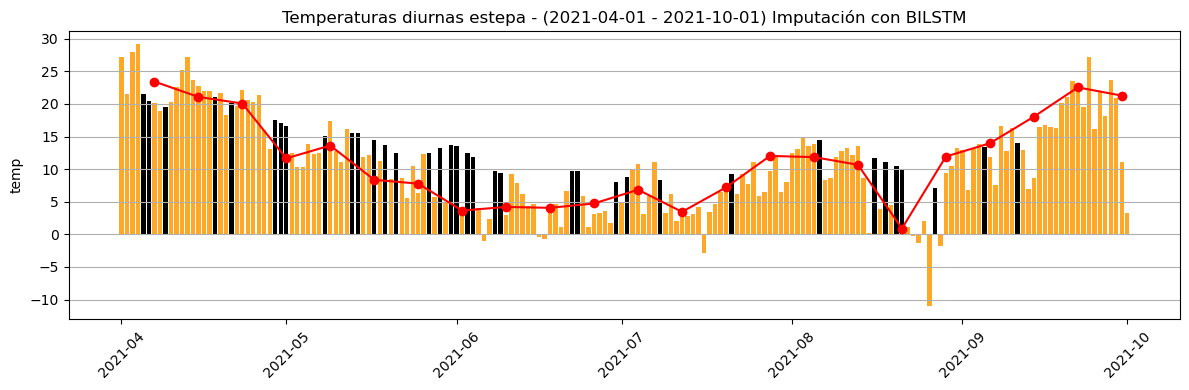

In [139]:
plot_serie('2021-04-01', '2021-10-01', 'estepa', metodo)

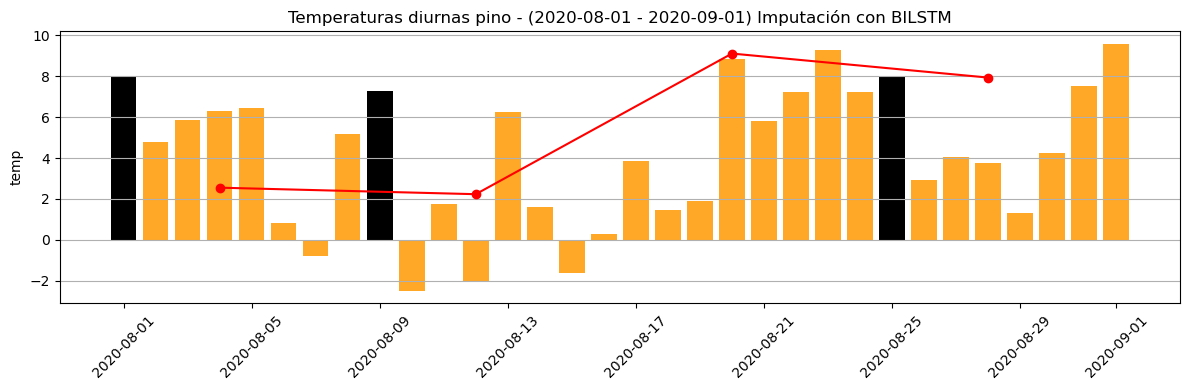

In [147]:
plot_serie('2020-08-01', '2020-09-01', 'pino', metodo, imputados=True)

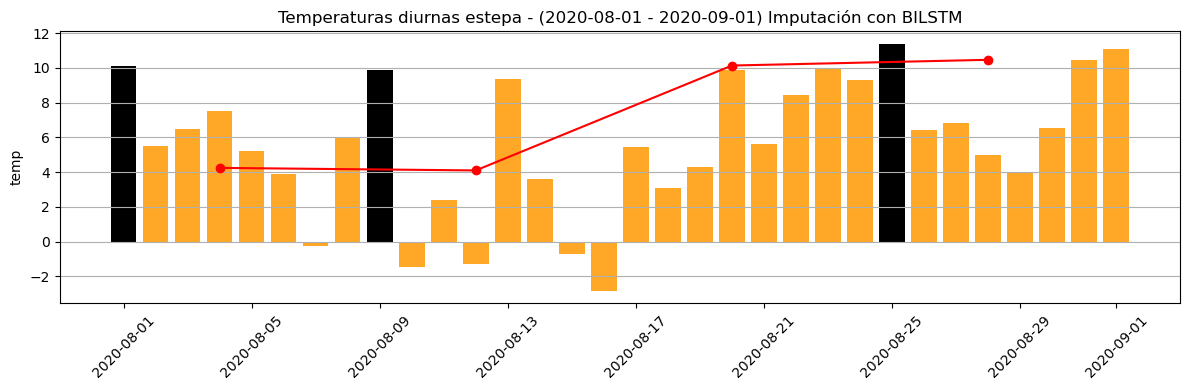

In [148]:
plot_serie('2020-08-01', '2020-09-01', 'estepa', metodo, imputados=True)